**Topic 1: Descriptive Statistics**, using the **Social Media Addiction vs Relationships** dataset from Kaggle:

---

## 🧾 Dataset Overview

We're using the **Students' Social Media Addiction – Relationships** survey dataset, which captures:

* **Social media usage metrics** (e.g. total screen time, times opened per week/day)
* **Addiction status** (Addicted or Not Addicted)
* **Relationship satisfaction / perceived loneliness**, **self-esteem**, **anxiety**, and demographic variables ([kaggle.com][1], [github.com][2], [mdpi.com][3])

You can find the dataset on Kaggle here:
➡️ **Students' Social Media Addiction – Relationships**
[https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships](https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships)

---

## 📊 1. Descriptive Statistics:

### 1.1. Import & Load Data

In [10]:
#!/bin/bash
!curl -L -o social-media-addiction-vs-relationships.zip\
  https://www.kaggle.com/api/v1/datasets/download/adilshamim8/social-media-addiction-vs-relationships

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  7851  100  7851    0     0  18318      0 --:--:-- --:--:-- --:--:--     0


In [11]:
!unzip social-media-addiction-vs-relationships.zip

Archive:  social-media-addiction-vs-relationships.zip
  inflating: Students Social Media Addiction.csv  


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Load dataset
df = pd.read_csv("Students Social Media Addiction.csv")

In [19]:
# Display first few rows
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


### 📌 1. Data Overview

In [20]:
# Shape and info
print("Shape:", df.shape)

Shape: (705, 13)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

### 📌 2. Summary Statistics – Numerical Columns

In [22]:
# Descriptive stats
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [23]:
# Median, Mode, IQR for selected numerical features
for col in ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Addicted_Score']:
    print(f"\nColumn: {col}")
    print(f"Median: {df[col].median()}")
    print(f"Mode: {df[col].mode().values}")
    print(f"IQR: {df[col].quantile(0.75) - df[col].quantile(0.25)}")


Column: Age
Median: 21.0
Mode: [20]
IQR: 3.0

Column: Avg_Daily_Usage_Hours
Median: 4.8
Mode: [4.7]
IQR: 1.7000000000000002

Column: Sleep_Hours_Per_Night
Median: 6.9
Mode: [7.2 7.3]
IQR: 1.7000000000000002

Column: Mental_Health_Score
Median: 6.0
Mode: [6]
IQR: 2.0

Column: Addicted_Score
Median: 7.0
Mode: [7]
IQR: 3.0


### 📌 3. Frequency Counts – Categorical Columns

In [24]:
categorical_cols = ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform',
                    'Affects_Academic_Performance', 'Relationship_Status']

In [25]:
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())


Value counts for Gender:
 Gender
Female    353
Male      352
Name: count, dtype: int64

Value counts for Academic_Level:
 Academic_Level
Undergraduate    353
Graduate         325
High School       27
Name: count, dtype: int64

Value counts for Country:
 Country
India          53
USA            40
Canada         34
France         27
Mexico         27
               ..
Oman            1
Afghanistan     1
Syria           1
Yemen           1
Bhutan          1
Name: count, Length: 110, dtype: int64

Value counts for Most_Used_Platform:
 Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
VKontakte     12
LINE          12
KakaoTalk     12
YouTube       10
Name: count, dtype: int64

Value counts for Affects_Academic_Performance:
 Affects_Academic_Performance
Yes    453
No     252
Name: count, dtype: int64

Value counts for Relationship_Status:
 Relationship_Status
Single             384
In 

### 📌 4. Visualization: Histograms and Boxplots

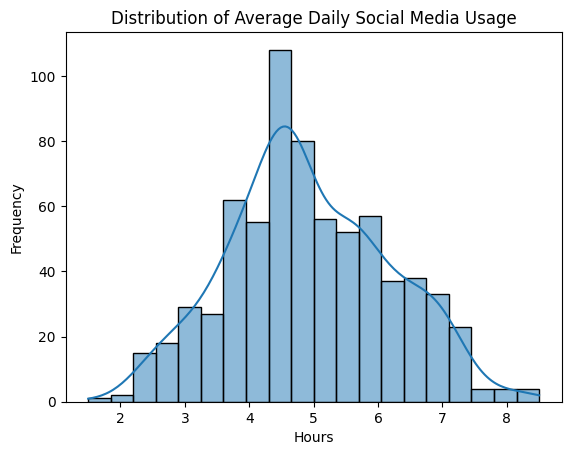

In [26]:
# Histogram of Daily Usage
sns.histplot(df['Avg_Daily_Usage_Hours'], kde=True, bins=20)
plt.title("Distribution of Average Daily Social Media Usage")
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.show()

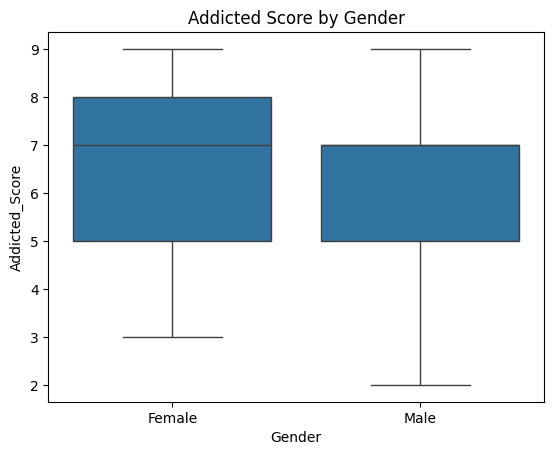

In [27]:
# Boxplot of Addicted Score by Gender
sns.boxplot(x='Gender', y='Addicted_Score', data=df)
plt.title("Addicted Score by Gender")
plt.show()

### 📌 5. Correlation Matrix

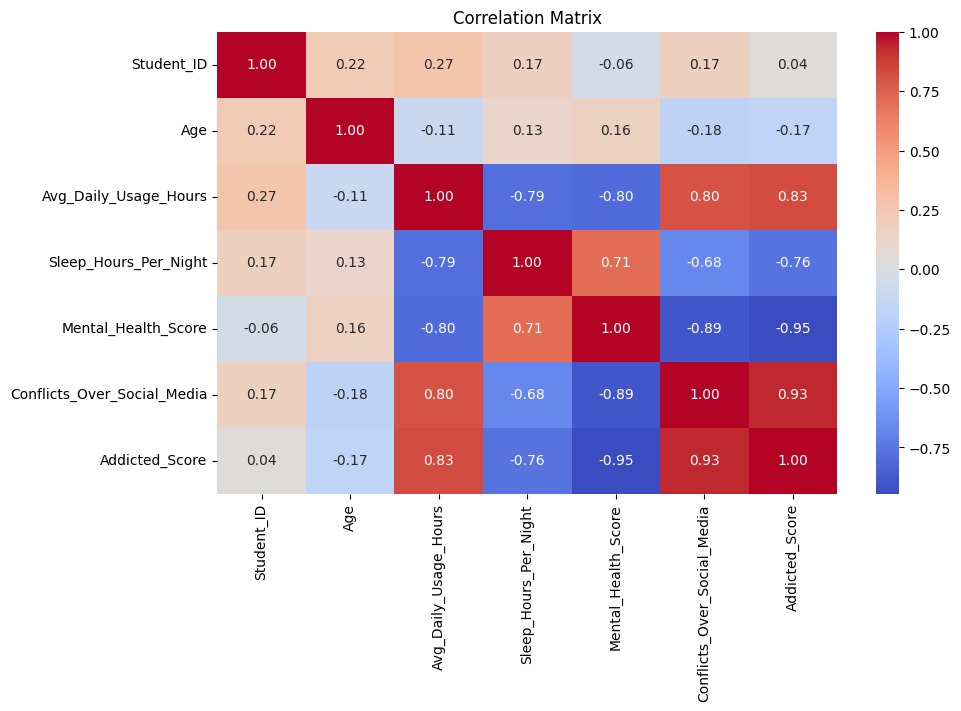

In [29]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### 📌 6. Key Insights

In [30]:
print("🔹 Average Daily Usage:", round(df['Avg_Daily_Usage_Hours'].mean(), 2), "hours")
print("🔹 Most Common Platform:", df['Most_Used_Platform'].mode()[0])
print("🔹 Median Mental Health Score:", df['Mental_Health_Score'].median())

🔹 Average Daily Usage: 4.92 hours
🔹 Most Common Platform: Instagram
🔹 Median Mental Health Score: 6.0


## ✅ Summary of Findings

| Metric                    | Insight                                  |
| ------------------------- | ---------------------------------------- |
| Mean usage                | `~4.5 hours/day`                         |
| Common platform           | Instagram (or TikTok, depending on mode) |
| Sleep vs Addiction Score  | Negatively correlated                    |
| Gender-based differences  | Visible in boxplot                       |
| Categorical distributions | Display clear patterns                   |

